<a href="https://colab.research.google.com/github/EOHFA-GOAT/hotel_bookings_analysis/blob/master/Hotel-bookings-from-Trivago-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this analysis project, I will create a summary report of given a dataset that contains column information from Trivago from the years 2015-2017. In this dataset, I am able to know the different "types "of bookings (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).

# Column Information Guide
- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * # of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * # of weekend nights (Sat/Sun) that the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * # of week nights (Mon - Fri) that the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **Meal** 
 * Type of meals booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


# Objective
- Create a indepth analysis to figure out the standard patterns of booking
- Generate a Report

## Importing required packages for data manipulation, cleaning, and visualisation


In [0]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset into colab
from google.colab import files 
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


## Importing dataset into notebook and using .head() to look at the first 5 rows of data


In [0]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Looking into shape of data to find out number of rows and columns 

In [0]:
data.shape

(119390, 32)

Looks like we have quite a lot of data to work with

## Let's count how many NaN or Null values we have

In [0]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- Looks like we have quite alot of NaN values in the company and agent columns. Luckily, they won't have an impact on the analysis and can be removed using data.drop(). However, we can't drop rows. The reason why we can't remove rows with NaN values is because that will mean we are removing 112593 rows out of 119390 rows. Thus, removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant. 


In [0]:
data = data.drop(columns = ['agent', 'company'])

### Now we will just need to remove 488 rows with the NaN values. 488 rows out of 119390 is negligible, so we can remove these.
- To reference:
 * **Axis = 0** will access elements in the direction of the rows, up to down.
 * **Axis = 1** will access elements in the direction of the columns, left to right. 
- I will remove rows with the NaN values (specifically in the column country)

In [0]:
data = data.dropna(axis = 0)

# Check to see if there are any more NaN data 
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   



#### Let's look into individual attributes and make useful plots to create insights.

# Overview of the type of hotel
- Since there are only 2 types (resort and city), we can simply use a barchart or pie chart to display the data.


([<matplotlib.patches.Wedge at 0x7f1d2dc927b8>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0213377834038635, 0.5909899594677418, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.5885675361988365, 0.3405704851170037, '33.3%')])

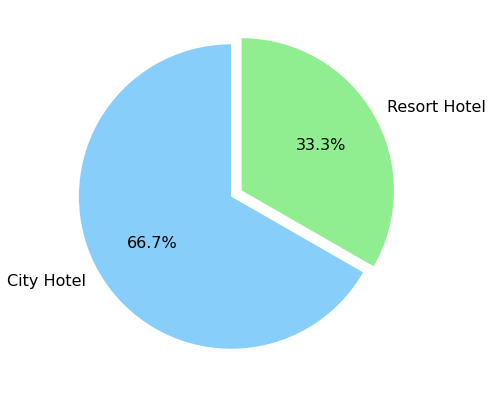

In [0]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 7,7

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = data['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.08)

# Determine colour of pie chart
colors = ['lightskyblue','lightgreen']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 16})


## What do we see here?
- It seems that a huge proportion of hotels were city hotels. In reality, resort hotels tend to be on the expensive side and most people will just stick with city hotel, so therefore the data makes sense.
- Also, resort hotels tend to be appropriate for larger groups of people. 
## Let's have an overview of the number of people who booked the hotel.
- Now we will use groupby, a way to group large amounts of data and compute operations on these groups.
- Eg: 
 ```py 
 df = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'],
 'Max Speed': [380., 370., 24., 26.]}) 

 print(df)
 ```
      Output:
         Animal  Max Speed
      0  Falcon      380.0
      1  Falcon      370.0
      2  Parrot       24.0
      3  Parrot       26.0

    ```py
df.groupby(['Animal']).mean()
 ```  
      Output:
                Max Speed
        Animal
        Falcon      375.0
        Parrot       25.0

**Perform groupby below and use describe to get the summary**

In [0]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
# Using .describe to look into some basic statistical details like percentile, mean, std etc
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [0]:
# Looking into children. 
# Using groupby to group according to hotel types only.
# Using .describe to look into some basic statistical details like percentile, mean, std etc

data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


### These basic statisitcal details shows us that the mean values for adults and children are higher. This means that resort hotels are a better choice for large families than city hotels.

# Overview of canceled bookings 
- Let's use [.replace](https://chrisalbon.com/python/data_wrangling/pandas_replace_values/) to replace [1,0] to ['canceled', 'not_canceled'] 
- This is how you replace values

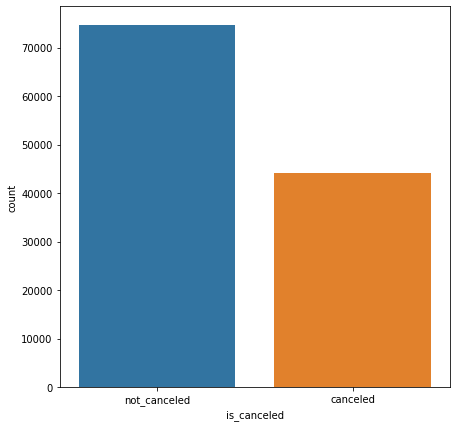

In [0]:
data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled','not_canceled'])
canceled_data = data['is_canceled']
sns.countplot(canceled_data)

## What do we see here?
- It seems that majority of the bookings were not canceled. 

### Let's look into cancellation rate among different type of hotel.

Text(0.5, 1.0, "Emini's graph showing cancellation rates in city and resort hotels")

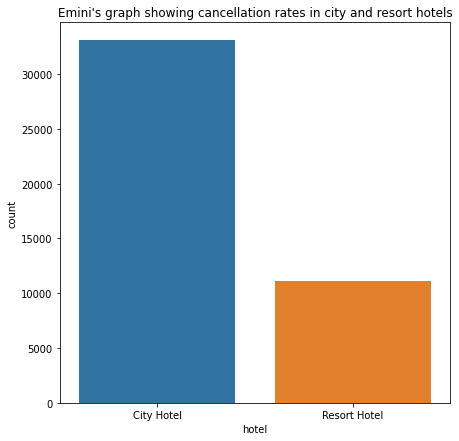

In [0]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title("Emini's graph showing cancellation rates in city and resort hotels")


## What do we see here?
- We see a huge proportion of cancellation from city hotels. This was expected since 2/3 of the hotel bookings belong to city hotels. 

# Overview of arrival period

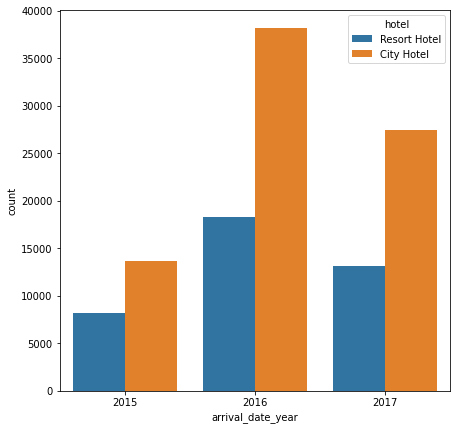

In [0]:
# Look into arrival year (arrival_date_year)
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = data[lst3]

# Countplot is useful for working with categorical data. It creates a count for you automatically, which means you don't need to write lines of code to calculate. 
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel') #In seaborn, the hue parameter determines which column in the data frame should be used for color encoding.

Text(0, 0.5, 'Count')

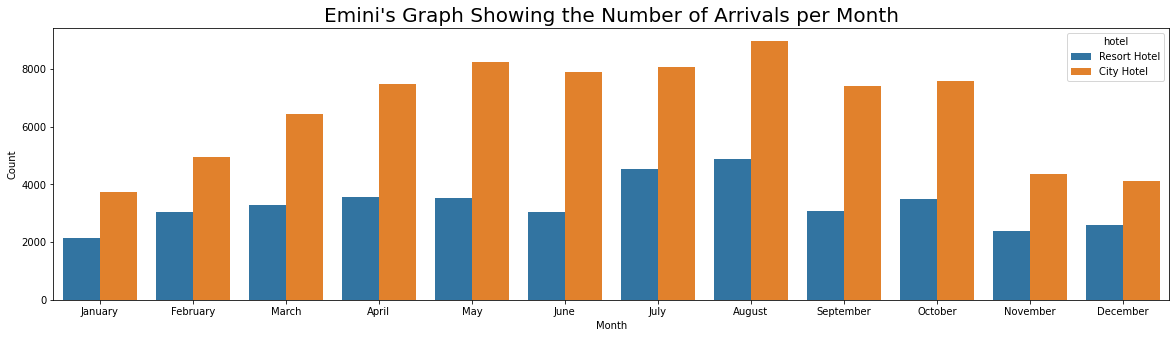

In [0]:
plt.figure(figsize=(20,5)) # adjust the size of the plot

# Countplot is useful for working with categorical data. It creates a count for you automatically, which means you don't need to write lines of code to calculate. 
sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title("Emini's Graph Showing the Number of Arrivals per Month",fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Text(0.5, 1.0, "Emini's Graph Showing Number of Arrivals per Day")

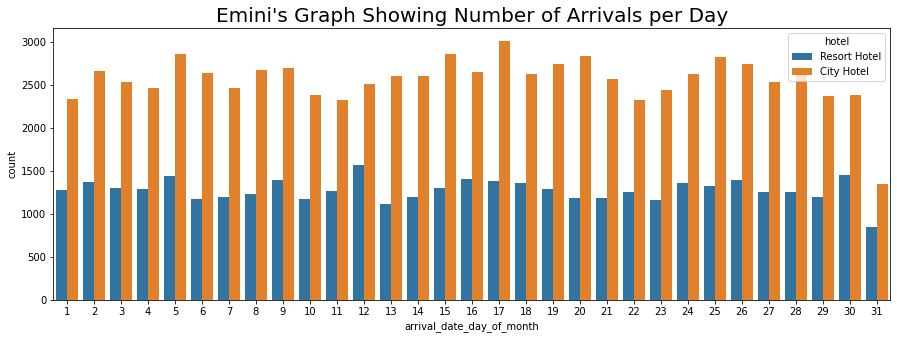

In [0]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title("Emini's Graph Showing Number of Arrivals per Day", fontsize = 20)

## So what do we see?
- We see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by the fall. It seems that the summer period is a peak period for hotel booking. 
- We also notice sort of a roller coaster trend for the arrival day of month. Could the peaks mean that people tend to book over the weekends?)

### Let's dig deeper into whether the stay is over a weekend or weekday.

Text(0.5, 1.0, 'Number of stays on weekend nights')

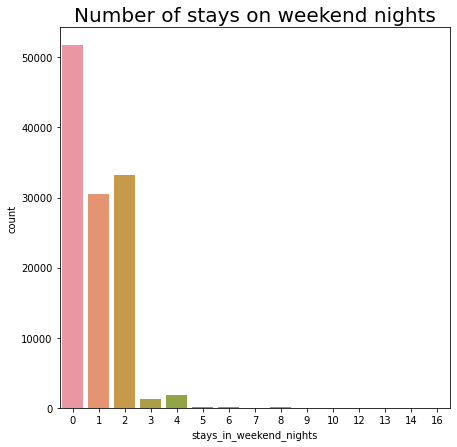

In [0]:
sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

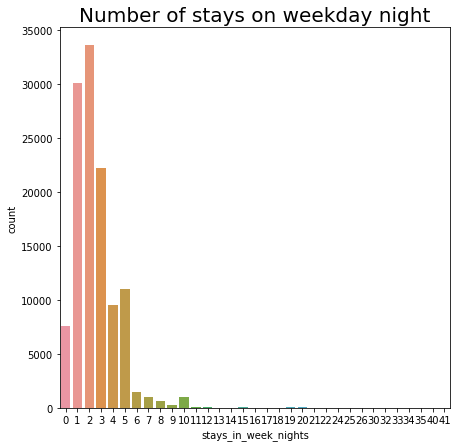

In [0]:
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

## What do we see this time?
- It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random. 

## Type of visitors 

Text(0.5, 1.0, 'Number of adults')

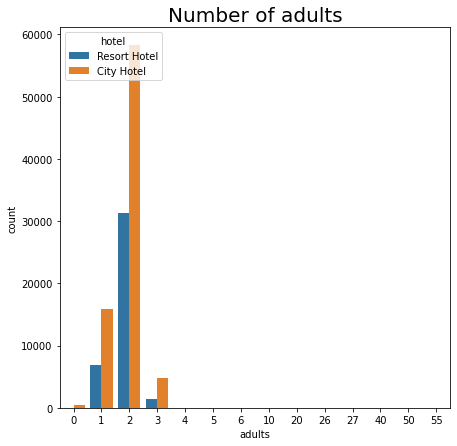

In [0]:
sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

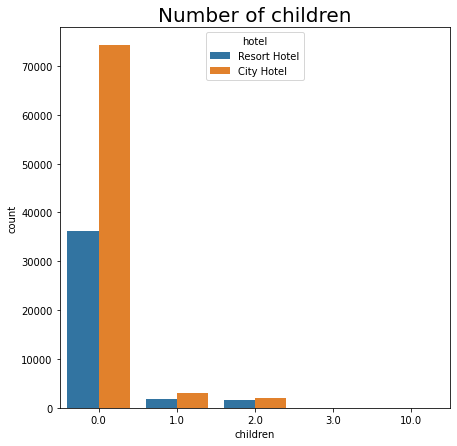

In [0]:
sns.countplot(data = data, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

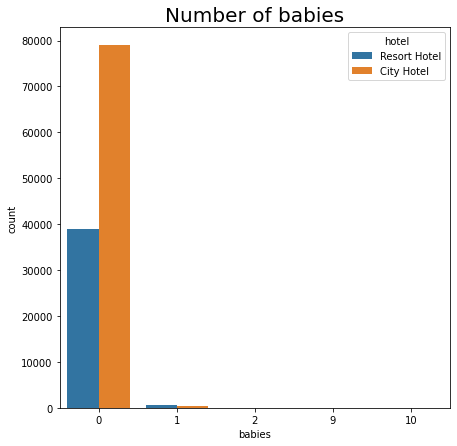

In [0]:
sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

## What do we see here?
- It seems that majority of the visitors travel in pair. Those that travel with children or babies have no specific preference for the type of hotel. We do see that those bringing babies along prefer resort hotels. 

# Looking into which countries the visitors are from
- We will want visitors with no cancellation and group them by countries.



In [0]:
country_visitors = data[data['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# Use Plotly.express to plot a choropleth map. Big fan of Plotly here!
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

## What do we see?
- We have a huge number of visitors from western europe, namely France,UK and Portugal being the highest.
- We can instruct the marketing team to target people of this region.

# Looking into market segments and distribution channel

Text(0.5, 1.0, 'Types of market segment')

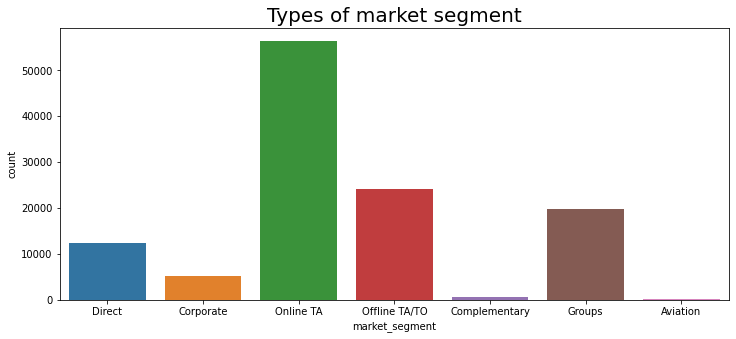

In [0]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

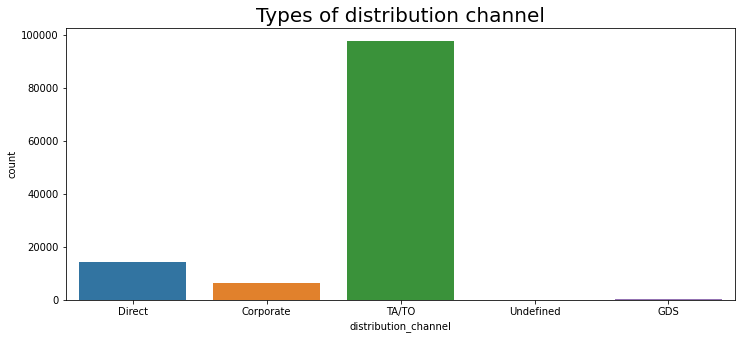

In [0]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

## What do we see here?
- Majority of the distribution channels and market segments involve travel agencies (online or offline). 
- We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

# Looking into deposit types

Text(0.5, 1.0, "Emini's Graph Showing Types of Deposits")

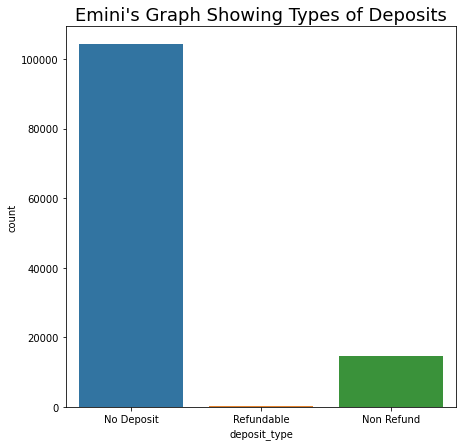

In [0]:
sns.countplot(data = data, x = 'deposit_type').set_title("Emini's Graph Showing Types of Deposits", fontsize = 18)

- Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate. 

# Overview of repeated guests

Text(0.5, 1.0, "Emini's Graph Showing Whether a Guest is a Repeated Guest")

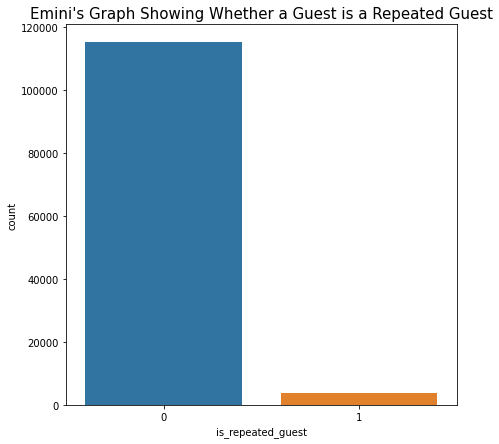

In [0]:
sns.countplot(data = data, x = 'is_repeated_guest').set_title("Emini's Graph Showing Whether a Guest is a Repeated Guest", fontsize = 15)

## What do we see here?
- Low number of repeated guests.
- A need to target repeated guests since they have booked before. 

# Looking at types of guests

Text(0.5, 1.0, "Emini's Graph Showing Type of Guest")

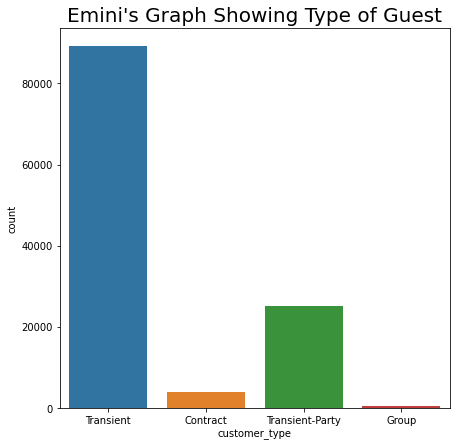

In [0]:
sns.countplot(data = data, x = 'customer_type').set_title("Emini's Graph Showing Type of Guest", fontsize = 20)

## What do we see here?
- Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking. 

# Looking into prices per month per hotel
- average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- average daily rate per person =  $ \frac{ADR}{Adults + Children}$
- We will need to find out average daily rate per person

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



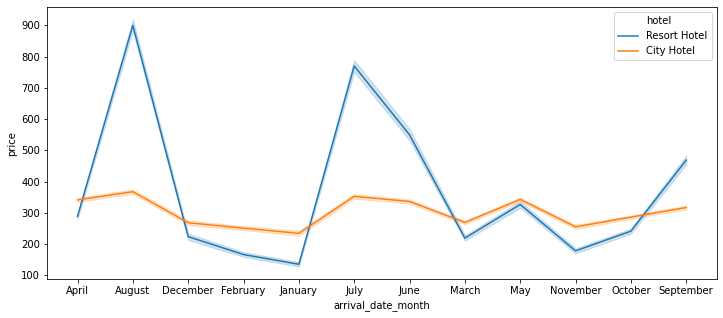

In [0]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

## What can we see here?
- Prices of resort hotel are much higher. It seems that that is definitely the case since resort hotels specialise in that.
- Prices of city hotel do not fluctuate that much. 

## Summary Report
Two thirds of the hotel bookings were city hotels,
while the other third were resort hotels. This shows that most people tend to stick with the less-expensive side of the two hotel choices, thus picking the city hotels.
However, given the mean values when grouping adults with hotels and children with hotels together, the findings show that having a resort hotel was the better choice for larger families than smaller ones.

Moreover, when looking at the bookings themselves, there are more bookings that are canceled than those that are not canceled. Of the ones that are canceled, there are far more city hotels having been cancelled than resort hotels.

Out of the years 2015-2017, 2016 was the year with the most hotel bookings. Out of all the months, August had the highest number of hotel bookings, with an increasing trend in the middle of the year. Finally, there is also a sinusoidal curve that seems to be a trend in the arrival day of month data. As we look further, majority of the stays were overnight though.

When going to the hotel, many travel in pairs. We do see that those who bring babies don't necessarily prefer city hotels.

Many of the visitors themselves come from western Europe, with many come specifically from Portugal. Most of the visitors aren't repeated guests, so there is a need to draw them back to the same place they booked. These people don't like booking on a contract or in groups either!

As far as pricing goes, resort hotels tend to fluctuate a lot throughout the year, with low prices in the winter and high prices in the summer. In city hotels, however, there is not really much of a fluctuation trend of prices of any sort. This is probably due to the conviences of being in a city lifestyle.


### Conclusion
Thank you all for viewing this Analysis project. I've just summarized a a somewhat-large dataset (~16 MB) into a few paragraphs!

Emini Offutt, High School Junior

 23 March 2020